Random Forest Algorithm Intuition:
Random Forest is an ensemble learning method that builds 
multiple decision trees during training and merges their 
predictions to improve accuracy and prevent overfitting.
Each decision tree is built on a random subset of features 
and data samples , and the final prediction is based on 
the combined predictions of all trees.
Advantages of Random Forest:
High Accuracy: Random Forests generally provide high 
accuracy due to the combination of multiple decision 
trees.
Handles Missing Values: Random Forests can handle missing 
data without imputation.
Reduced Overfitting: The randomness in feature selection 
and data sampling reduces overfitting compared to 
individual decision trees.
Feature Importance: It can provide insights into feature 
importance, aiding in feature selection.
Disadvantages of Random Forest:
Complexity: Random Forests can be computationally 
intensive and may require tuning of hyperparameters.
Less Interpretability: While they offer feature 
importance, interpreting individual tree decisions can be 
challenging.
Training Time: Training a Random Forest model can take 
longer compared to simpler algorithms like Decision Trees.
Difference between Random Forests and Decision Trees:
Random Forests are an ensemble of decision trees, while 
Decision Trees are single trees.
Random Forests introduce randomness in feature selection 
and data sampling to reduce overfitting, whereas Decision 
Trees can easily overfit on training data.
Relationship between Random Forests and Nearest Neighbors:
Random Forests and k-Nearest Neighbors (KNN) are different 
algorithms.
Random Forests use decision trees for classification, 
while KNN classifies based on the majority class among its 
k-nearest neighbo

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('heart-disease.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
# scale numerical values to comparable ranges
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [9]:
X = dataset.drop(['target'], axis=1)
y = dataset['target']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=42)

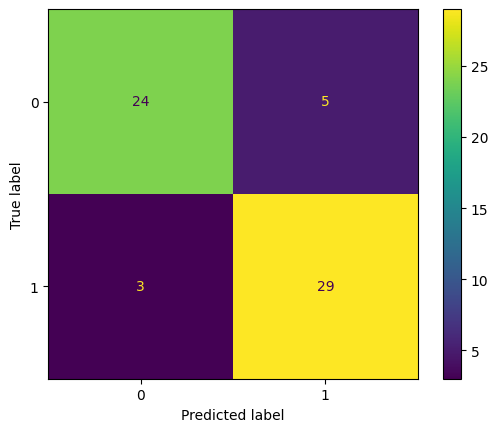

In [10]:
def_model =RandomForestClassifier()
def_model.fit(Xtrain,ytrain)
y_pred1 = def_model.predict(Xtest)
cm1 = confusion_matrix(ytest,y_pred1)
disp1 = ConfusionMatrixDisplay.from_predictions(ytest,y_pred1)

In [12]:
from sklearn.metrics import classification_report


print(classification_report(ytest, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



pecision
For class 0 (no heart disease), the precision is 0.78, 
meaning that when the model predicts no heart disease, it 
is correct 78% of the time.
For class 1 (presence of heart disease), the precision is 
0.82, indicating that when the model predicts heart 
disease, it is correct 82% of the time.
Recall
The recall for class 0 is also 0.78, which means that of 
all the actual no heart disease cases, the model correctly 
identifies 78%.
The recall for class 1 is 0.82, so the model correctly 
identifies 82% of all actual heart disease cases.
F1-Score
The F1-score for both classes is quite balanced, with 0.78 
for class 0 and 0.82 for class 1. This score gives a 
combined idea of how precise and robust the model's 
predictions are.
Accuracy
The overall accuracy of the model is 0.80, meaning the 
model correctly predicts the presence or absence of heart 
disease 80% of the time across all cases.
Analysis
this model shows a good balance between precision and 
recall, indicating it is equally skilled at identifying 
positive cases among the actual positives and minimizing 
false positives.
The balanced macro and weighted averages indicate that the 
model performs consistently across both classe

In [15]:
model = RandomForestClassifier(n_estimators=500,n_jobs=-1, random_state=0)
model.fit(Xtrain, ytrain)
y_pred2 = model.predict(Xtest)
cm = confusion_matrix(ytest, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(ytest))

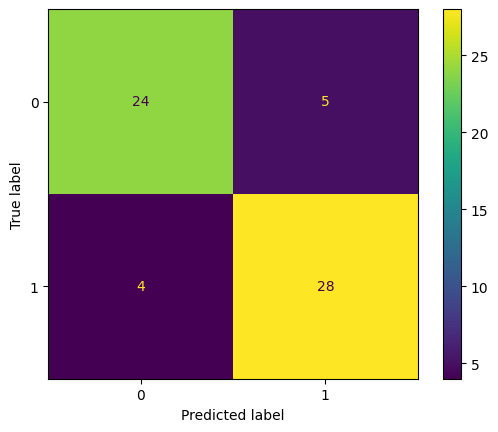

In [17]:
disp.plot()
plt.show()